In [1]:
# importing dependencies.
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from scipy.stats import stats


In [2]:
# starting the project by making a standardized dataframe for unemployment across 
# the 7 metro counties of the Twin Cities in Minnesota. 

# Life expectancy over variables by county of the 7 county metro in Twin Cities, MN

# reading the unemployment csv into jupyter.
raw_unemployment = pd.read_csv('Unemployment_data.csv')

In [3]:
# looking at the data in jupyter
raw_unemployment

,Year/Month,Carver County,Hennepin County,Dakota County,Ramsey County,Washington County,Anoka County,Scott County
0,2015 Annual Avg.,3.2,3.3,3.3,3.5,3.1,3.6,3.1
1,2014 Annual Avg.,3.6,3.8,3.8,4.0,3.6,4.1,3.6
2,2013 Annual Avg.,4.3,4.6,4.5,4.9,4.4,5.0,4.4
3,2012 Annual Avg.,4.8,5.2,5.2,5.7,5.1,5.9,5.0
4,2011 Annual Avg.,5.5,6.1,6.1,6.6,5.9,6.8,5.8
5,2010 Annual Avg.,6.7,7.0,7.0,7.5,6.7,8.0,6.9


In [4]:
# converting six years of data into a six-year average for unemployment percentage (UP).
mean_unemployment = raw_unemployment.mean()

# rounding to two decimal points.
mean_unemployment = mean_unemployment.round(2)

# looking at cleaner version
mean_unemployment


Carver County                       4.68
Hennepin County                     5.00
Dakota County                       4.98
Ramsey County                       5.37
Washington County                   4.80
Anoka County                        5.57
Scott County                        4.80
dtype: float64

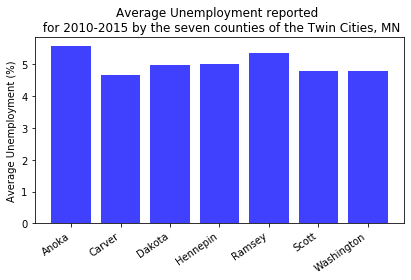

<Figure size 432x288 with 0 Axes>

In [5]:
# creating a dataframe from our relevant data and setting the counties list to alphabetical.
counties = ["Anoka", "Carver", "Dakota", "Hennepin", "Ramsey", "Scott", "Washington"]
numbers = [5.57, 4.68, 4.98, 5.00, 5.37, 4.80, 4.80]

# going pandas (imported above).
unemployment_df = pd.DataFrame({"County":counties, "Avg. Unemployment (%)":numbers})

# creating a bar chart using matplotlib (imported above).
unemployment_bar = plt.bar(unemployment_df["County"], unemployment_df["Avg. Unemployment (%)"], 
                           color='b',alpha=.75, align="center")
plt.title("Average Unemployment reported \n for 2010-2015 by the seven counties of the Twin Cities, MN")

plt.ylabel("Average Unemployment (%)")
plt.xticks(counties, ha="right", rotation=35)

# saving this graph as a sweet layout .png file to be added anywhere. 
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('unemployment.png',dpi = 300)

In [6]:
# Next step of project: is making a standardized dataframe for education level across 
# the 7 metro counties of the Twin Cities in Minnesota over the years of 2010 - 2015. 

In [7]:
# in case the actual url is needed to get the newest data, use this on the next line of code:
# life_url = "https://github.com/katheron/Working_Title/blob/master/Pop_Income_AH/life_data/life.csv"

In [8]:
#bringing in the data for life expectancy by County
lifex_df = pd.DataFrame({"Counties":["Anoka", "Carver", "Dakota", "Hennepin", "Ramsey", "Scott", "Washington"], 
                         "Life Expectancy": [80.14, 82.37, 80.68, 80.32, 79.53, 80.81, 81.85]})
lifex_df

,Counties,Life Expectancy
0,Anoka,80.14
1,Carver,82.37
2,Dakota,80.68
3,Hennepin,80.32
4,Ramsey,79.53
5,Scott,80.81
6,Washington,81.85


In [9]:
#creating a standardized df 
life_unemployment_df = pd.DataFrame({"Counties":lifex_df["Counties"], "Life Expectancy":lifex_df["Life Expectancy"], 
                                    "Unemployment %":unemployment_df["Avg. Unemployment (%)"]})
life_unemployment_df

,Counties,Life Expectancy,Unemployment %
0,Anoka,80.14,5.57
1,Carver,82.37,4.68
2,Dakota,80.68,4.98
3,Hennepin,80.32,5.00
4,Ramsey,79.53,5.37
5,Scott,80.81,4.80
6,Washington,81.85,4.80


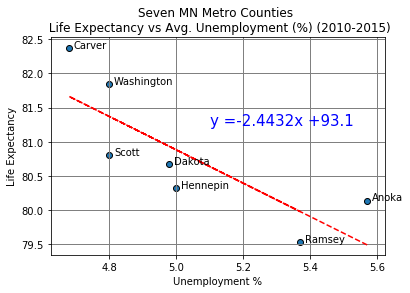

In [10]:
#perform linear regression
n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(life_unemployment_df["Unemployment %"],
                                                       life_unemployment_df['Life Expectancy'])

#regression equation line
n_fit = n_slope * life_unemployment_df["Unemployment %"] + n_int

#line equation
line_eq = 'y =' + str(round(n_slope,4)) + "x +" + str(round(n_int,2))

# x,y and z variables for plot labels
x = life_unemployment_df["Unemployment %"]
y = life_unemployment_df['Life Expectancy']
z = life_unemployment_df['Counties']

# scatter plot
fig, ax = plt.subplots()
plt.scatter(life_unemployment_df["Unemployment %"],life_unemployment_df['Life Expectancy'], 
            label=lifex_df["Counties"], edgecolors="black")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(life_unemployment_df["Unemployment %"],n_fit,"--",color="red")

# printing line equation on plot
plt.annotate(line_eq,xy=(5.1,81.25),fontsize=15,color='blue')

#for loop to print labels on the plots
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), textcoords="offset points", # how to position the text
                 xytext=(5,0),ha='left')
    
# x and y labels and title
plt.xlabel("Unemployment %")
plt.ylabel("Life Expectancy")
plt.title("Seven MN Metro Counties \n Life Expectancy vs Avg. Unemployment (%) (2010-2015)")
plt.show()

# saving plot to Home Page
fig.savefig('LifeExpectancy_vs_Unemployment.png',dpi=300)

In [11]:
print(f'The r-value is {round(n_r,4)}. –0.70. A strong downhill (negative) linear relationship')
print(f'The p-value is {round(n_p,4)}. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.')
print(f'The standard error is {round(n_std_err,4)}.')

The r-value is -0.8068. –0.70. A strong downhill (negative) linear relationship
The p-value is 0.0283. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
The standard error is 0.8002.


In [12]:
# reading the csv into jupyter nb
raw_education = pd.read_csv('education_level.csv')

In [13]:
# looking at our data
raw_education     

,CO_CODE,CTU_NAME,SUMLEV,YEAR,DATASOURCE,DATASOURCE_DESC,SUBJECT_AREA,SUBJECT_AREA_DESC,SUBJECT_LEVEL,SUBJECT_LEVEL_DESC,DENOMINATOR_LEVEL_DESC,MEASURE,DENOMINATOR
0,3,Anoka County,50,2010,ACS 2008-2010,American Community Survey 3Yr Summary File 200...,POPEDULEV,Highest Level of Education Attained,LESSHS,Did not graduate high school,Population 25 years and over,14900,215957
1,3,Anoka County,50,2010,ACS 2008-2010,American Community Survey 3Yr Summary File 200...,POPEDULEV,Highest Level of Education Attained,HIGHSCHOOL,High school graduate,Population 25 years and over,65347,215957
2,3,Anoka County,50,2010,ACS 2008-2010,American Community Survey 3Yr Summary File 200...,POPEDULEV,Highest Level of Education Attained,SOMECOLLEGE,"Some college, no degree",Population 25 years and over,54671,215957
3,3,Anoka County,50,2010,ACS 2008-2010,American Community Survey 3Yr Summary File 200...,POPEDULEV,Highest Level of Education Attained,ASSOCIATE,Associate degree,Population 25 years and over,24909,215957
4,3,Anoka County,50,2010,ACS 2008-2010,American Community Survey 3Yr Summary File 200...,POPEDULEV,Highest Level of Education Attained,BACHELORS,Bachelor degree,Population 25 years and over,39903,215957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,163,Washington County,50,2015,ACS 2011-2015,American Community Survey 5Yr Summary File 201...,POPEDULEV,Highest Level of Education Attained,HIGHSCHOOL,High school graduate,Population 25 years and over,36305,164696
416,163,Washington County,50,2015,ACS 2011-2015,American Community Survey 5Yr Summary File 201...,POPEDULEV,Highest Level of Education Attained,SOMECOLLEGE,"Some college, no degree",Population 25 years and over,34788,164696
417,163,Washington County,50,2015,ACS 2011-2015,American Community Survey 5Yr Summary File 201...,POPEDULEV,Highest Level of Education Attained,ASSOCIATE,Associate degree,Population 25 years and over,18522,164696
418,163,Washington County,50,2015,ACS 2011-2015,American Community Survey 5Yr Summary File 201...,POPEDULEV,Highest Level of Education Attained,BACHELORS,Bachelor degree,Population 25 years and over,44999,164696


In [14]:
# looking for missing data
raw_education.count()

# dropping columns that are not wanted
raw_education = raw_education.drop(['CO_CODE', 'SUMLEV', 'DATASOURCE', 'DATASOURCE_DESC', 
                                    'SUBJECT_AREA', 'SUBJECT_AREA_DESC', 'SUBJECT_LEVEL', 
                                    'DENOMINATOR_LEVEL_DESC'], axis=1)
# taking a look
raw_education

,CTU_NAME,YEAR,SUBJECT_LEVEL_DESC,MEASURE,DENOMINATOR
0,Anoka County,2010,Did not graduate high school,14900,215957
1,Anoka County,2010,High school graduate,65347,215957
2,Anoka County,2010,"Some college, no degree",54671,215957
3,Anoka County,2010,Associate degree,24909,215957
4,Anoka County,2010,Bachelor degree,39903,215957
...,...,...,...,...,...
415,Washington County,2015,High school graduate,36305,164696
416,Washington County,2015,"Some college, no degree",34788,164696
417,Washington County,2015,Associate degree,18522,164696
418,Washington County,2015,Bachelor degree,44999,164696


In [15]:
# cleaning the column headers
clean_ed = raw_education.rename(columns={'CTU_NAME':'County', 'YEAR':'Year', 'SUBJECT_LEVEL_DESC':'Education Level', 
                                      'MEASURE':'Quantity', 'DENOMINATOR':'County Population'})
clean_ed

,County,Year,Education Level,Quantity,County Population
0,Anoka County,2010,Did not graduate high school,14900,215957
1,Anoka County,2010,High school graduate,65347,215957
2,Anoka County,2010,"Some college, no degree",54671,215957
3,Anoka County,2010,Associate degree,24909,215957
4,Anoka County,2010,Bachelor degree,39903,215957
...,...,...,...,...,...
415,Washington County,2015,High school graduate,36305,164696
416,Washington County,2015,"Some college, no degree",34788,164696
417,Washington County,2015,Associate degree,18522,164696
418,Washington County,2015,Bachelor degree,44999,164696


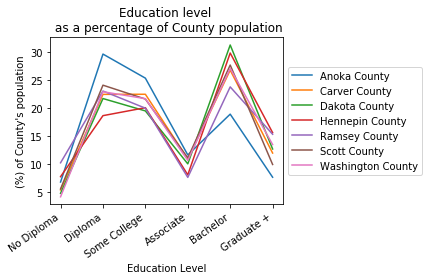

<Figure size 432x288 with 0 Axes>

In [16]:
# creating lists to hold variables for the following operations
ed_county = ["Anoka County", "Carver County", "Dakota County", "Hennepin County", "Ramsey County", "Scott County", "Washington County"]
levels = ["Did not graduate high school", "High school graduate", 
          "Some college, no degree", "Associate degree", "Bachelor degree", "Graduate/professional degree"]

# creating output lists to hold the averages for each county
anoka_out = []
carver_out = []
dakota_out = []
hennepin_out = []
ramsey_out =[]
scott_out = []
washington_out = []

# for loops that gather the percentage of the population within each education level per County 
anoka_df = clean_ed.loc[(clean_ed["County"] == "Anoka County")]
for level in levels:
    anoka_loop = anoka_df.loc[(anoka_df["Education Level"] == level)]
    anoka_quantity = anoka_loop["Quantity"].mean()
    anoka_pop = anoka_loop["County Population"].mean()
    anoka_percents = round((anoka_quantity/anoka_pop)*100, 2)
    anoka_out.append(anoka_percents)
    
carver_df = clean_ed.loc[(clean_ed["County"] == "Carver County")]
for level in levels:
    carver_loop = carver_df.loc[(carver_df["Education Level"] == level)]
    carver_quantity = carver_loop["Quantity"].mean()
    carver_pop = carver_loop["County Population"].mean()
    carver_percents = round((carver_quantity/carver_pop)*100, 2)
    carver_out.append(carver_percents)
    
dakota_df = clean_ed.loc[(clean_ed["County"] == "Dakota County")]
for level in levels:
    dakota_loop = dakota_df.loc[(dakota_df["Education Level"] == level)]
    dakota_quantity = dakota_loop["Quantity"].mean()
    dakota_pop = dakota_loop["County Population"].mean()
    dakota_percents = round((dakota_quantity/dakota_pop)*100, 2)
    dakota_out.append(dakota_percents)
    
hennepin_df = clean_ed.loc[(clean_ed["County"] == "Hennepin County")]
for level in levels:
    hennepin_loop = hennepin_df.loc[(hennepin_df["Education Level"] == level)]
    hennepin_quantity = hennepin_loop["Quantity"].mean()
    hennepin_pop = hennepin_loop["County Population"].mean()
    hennepin_percents = round((hennepin_quantity/hennepin_pop)*100, 2)
    hennepin_out.append(hennepin_percents)
    
ramsey_df = clean_ed.loc[(clean_ed["County"] == "Ramsey County")]
for level in levels:
    ramsey_loop = ramsey_df.loc[(ramsey_df["Education Level"] == level)]
    ramsey_quantity = ramsey_loop["Quantity"].mean()
    ramsey_pop = ramsey_loop["County Population"].mean()
    ramsey_percents = round((ramsey_quantity/ramsey_pop)*100, 2)
    ramsey_out.append(ramsey_percents)
    
scott_df = clean_ed.loc[(clean_ed["County"] == "Scott County")]
for level in levels:
    scott_loop = scott_df.loc[(scott_df["Education Level"] == level)]
    scott_quantity = scott_loop["Quantity"].mean()
    scott_pop = scott_loop["County Population"].mean()
    scott_percents = round((scott_quantity/scott_pop)*100, 2)
    scott_out.append(scott_percents)
    
washington_df = clean_ed.loc[(clean_ed["County"] == "Washington County")]
for level in levels:
    washington_loop = washington_df.loc[(washington_df["Education Level"] == level)]
    washington_quantity = washington_loop["Quantity"].mean()
    washington_pop = washington_loop["County Population"].mean()
    washington_percents = round((washington_quantity/washington_pop)*100, 2)
    washington_out.append(washington_percents)
    
# title, labels and tighter x-ticks    
pretty_labels = ["No Diploma", "Diploma", "Some College", "Associate", "Bachelor", "Graduate +"]
plt.title("Education level \n as a percentage of County population")
plt.xlabel("Education Level")
plt.ylabel("(%) of County's population")
plt.xticks(horizontalalignment = "right", rotation=35)

plt.plot(pretty_labels, anoka_out)
plt.plot(pretty_labels, dakota_out)
plt.plot(pretty_labels, carver_out)
plt.plot(pretty_labels, hennepin_out)
plt.plot(pretty_labels, ramsey_out)
plt.plot(pretty_labels, scott_out)
plt.plot(pretty_labels, washington_out)
plt.legend(ed_county,loc='center left', bbox_to_anchor=(1, 0.5))

fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()

# saving graph to Home Page
fig1.savefig('education.png',dpi = 300)

In [17]:
#manipulating data into a weighted average per County
an_ed = 0
ca_ed = 0
da_ed = 0
he_ed = 0
ra_ed = 0
sc_ed = 0
wa_ed = 0

a = 1
for y in anoka_out:
        z = y * a
        a = a + 1
        an_ed = an_ed + z
        
a = 1
for y in carver_out:
        z = y * a
        a = a + 1
        ca_ed = ca_ed + z
        
a = 1
for y in dakota_out:
        z = y * a
        a = a + 1
        da_ed = da_ed + z
        
a = 1
for y in hennepin_out:
        z = y * a
        a = a + 1
        he_ed = he_ed + z
         
a = 1
for y in ramsey_out:
        z = y * a
        a = a + 1
        ra_ed = ra_ed + z
         
a = 1
for y in scott_out:
        z = y * a
        a = a + 1
        sc_ed = sc_ed + z
         
a = 1
for y in washington_out:
        z = y * a
        a = a + 1
        wa_ed = wa_ed + z
ed_numbers = [an_ed, ca_ed, da_ed, he_ed, ra_ed, sc_ed, wa_ed]       
ed_numbers

[329.09000000000003, 379.53999999999996, 367.28, 380.62, 357.7, 361.11, 374.17]

In [18]:
# creating a df to hold standardized data
ed_single_number = pd.DataFrame({"Counties":["Anoka", "Carver", "Dakota", "Hennepin", "Ramsey", "Scott", "Washington"], 
                         "Life Expectancy": [80.14, 82.37, 80.68, 80.32, 79.53, 80.81, 81.85], 
                                 "Education level as a weighted average":ed_numbers})

ed_single_number

,Counties,Life Expectancy,Education level as a weighted average
0,Anoka,80.14,329.09
1,Carver,82.37,379.54
2,Dakota,80.68,367.28
3,Hennepin,80.32,380.62
4,Ramsey,79.53,357.70
5,Scott,80.81,361.11
6,Washington,81.85,374.17


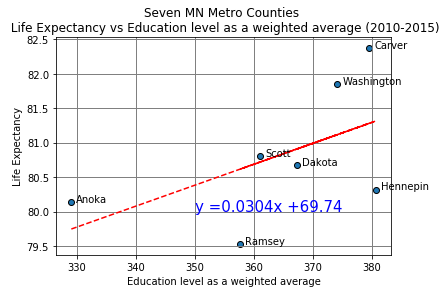

In [19]:
# perform linear regression
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(ed_single_number["Education level as a weighted average"],
                                                       ed_single_number['Life Expectancy'])

# regression equation line
m_fit = m_slope * ed_single_number["Education level as a weighted average"] + m_int

# line equation
line_eq = 'y =' + str(round(m_slope,4)) + "x +" + str(round(m_int,2))

# x,y and z variables for plot labels
x = ed_single_number["Education level as a weighted average"]
y = ed_single_number['Life Expectancy']
z = ed_single_number['Counties']
fig, ax = plt.subplots()
# scatter plot
plt.scatter(ed_single_number["Education level as a weighted average"],ed_single_number['Life Expectancy'], 
            edgecolors="black")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(ed_single_number["Education level as a weighted average"],m_fit,"--",color="red")
plt.annotate(line_eq,xy=(350,80),fontsize=15,color='blue')

# plot labels
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), textcoords="offset points", # how to position the text
                 xytext=(5,0),ha='left') # more positioning of the text
    
#labels and title of plot
plt.xlabel("Education level as a weighted average")
plt.ylabel("Life Expectancy")
plt.title("Seven MN Metro Counties \n Life Expectancy vs Education level as a weighted average (2010-2015)")
plt.show()

# saving plot to Home Page
fig.savefig('LifeExpectancy_vs_Education.png',dpi=300)

In [20]:
print(f'The r-value is {round(m_r,4)}. +0.50. A moderate uphill (positive) relationship')
print(f'The p-value is {round(m_p,4)}. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.')
print(f'The standard error is {round(m_std_err,4)}.')

The r-value is 0.5471. +0.50. A moderate uphill (positive) relationship
The p-value is 0.2038. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
The standard error is 0.0208.
